In [10]:
import pandas as pd
teams=pd.read_csv("teams.csv")
teams

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
...,...,...,...,...,...,...,...,...,...
2009,ZIM,2000,26,19,25.0,179.0,71.1,0.0,0
2010,ZIM,2004,14,11,25.1,177.8,70.5,0.0,3
2011,ZIM,2008,16,15,26.1,171.9,63.7,3.0,4
2012,ZIM,2012,9,8,27.3,174.4,65.2,4.0,0


In [11]:
teams= teams[["team","year","athletes","age","prev_medals","medals"]]
teams

,team,year,athletes,age,prev_medals,medals
0,AFG,1964,8,22.0,0.0,0
1,AFG,1968,5,23.2,0.0,0
2,AFG,1972,8,29.0,0.0,0
3,AFG,1980,11,23.6,0.0,0
4,AFG,2004,5,18.6,0.0,0
...,...,...,...,...,...,...
2009,ZIM,2000,26,25.0,0.0,0
2010,ZIM,2004,14,25.1,0.0,3
2011,ZIM,2008,16,26.1,3.0,4
2012,ZIM,2012,9,27.3,4.0,0


C:\Users\Raghav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


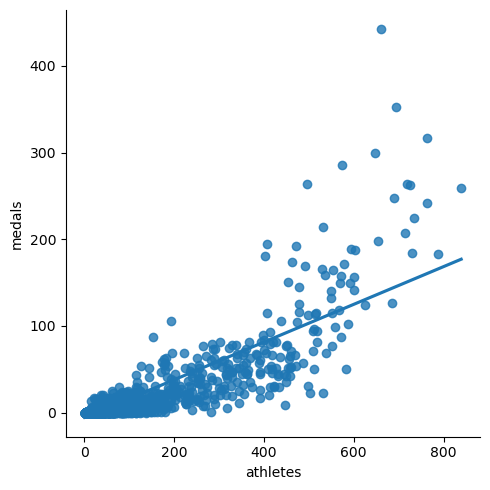

In [12]:
import seaborn as sns
sns.lmplot(x="athletes",y="medals",data=teams,fit_reg=True,ci=None)

In [13]:
train=teams[teams["year"]<2012].copy()
test= teams[teams["year"]>=2012].copy()

train.shape 
(1609,7)
test.shape
(405,7)
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
predictors=["athletes","prev_medals"]
target="medals"
reg.fit(train[predictors],train["medals"])
LinearRegression
predictions=reg.predict(test[predictors])
test["predictions"]=predictions
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,-0.961221
7,AFG,2016,3,24.7,1.0,0,-1.176333
23,ALB,2012,10,25.7,0.0,0,-1.425032
24,ALB,2016,6,23.7,0.0,0,-1.711847
35,ALG,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,-1.926958
2001,ZAM,2012,7,22.6,0.0,0,-1.640143
2002,ZAM,2016,7,24.1,0.0,0,-1.640143
2012,ZIM,2012,9,27.3,4.0,0,1.505767


In [14]:
test.loc[test["predictions"]<0,"predictions"]=0
test["predictions"]=test["predictions"].round()
test

,team,year,athletes,age,prev_medals,medals,predictions
6,AFG,2012,6,24.8,1.0,1,0.0
7,AFG,2016,3,24.7,1.0,0,0.0
23,ALB,2012,10,25.7,0.0,0,0.0
24,ALB,2016,6,23.7,0.0,0,0.0
35,ALG,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...
1983,YEM,2016,3,19.3,0.0,0,0.0
2001,ZAM,2012,7,22.6,0.0,0,0.0
2002,ZAM,2016,7,24.1,0.0,0,0.0
2012,ZIM,2012,9,27.3,4.0,0,2.0


In [35]:
test[test["team"]=="NOR"]

,team,year,athletes,age,prev_medals,medals,predictions
1376,NOR,2012,69,27.3,22.0,17,19.0
1377,NOR,2016,77,26.7,17.0,19,16.0


In [36]:
test[test["team"]=="CAN"]

,team,year,athletes,age,prev_medals,medals,predictions
324,CAN,2012,354,26.4,35.0,55,50.0
325,CAN,2016,405,26.0,55.0,69,68.0
